In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gmplot 
import statistics

from pandas import DataFrame

In [2]:
train_rent = pd.read_csv('./data/total_rent.csv')
train_rent.head(5)

,STATION,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,SNOWFALL,RENTCOUNT
0,1,2013,1,1,0,2,3,-8.8,NaN,0.1,90.0,8.8,0.0
1,1,2013,1,1,1,2,3,-8.5,NaN,0.9,90.0,8.8,0.0
2,1,2013,1,1,2,2,3,-8.5,NaN,1.0,89.0,8.8,0.0
3,1,2013,1,1,3,2,3,-9.0,NaN,0.7,91.0,8.8,0.0
4,1,2013,1,1,4,2,3,-9.1,NaN,0.6,92.0,8.8,0.0


In [3]:
train_return = pd.read_csv('./data/total_return.csv')
train_return.head(5)

,STATION,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,SNOWFALL,RETURNCOUNT
0,1,2013,1,1,0,2,3,-8.8,NaN,0.1,90.0,8.8,0.0
1,1,2013,1,1,1,2,3,-8.5,NaN,0.9,90.0,8.8,0.0
2,1,2013,1,1,2,2,3,-8.5,NaN,1.0,89.0,8.8,0.0
3,1,2013,1,1,3,2,3,-9.0,NaN,0.7,91.0,8.8,0.0
4,1,2013,1,1,4,2,3,-9.1,NaN,0.6,92.0,8.8,0.0


In [5]:
rent = pd.read_csv('./data/clean/tashu.csv')
rent.head(5)

,RENT_STATION,RENT_YEAR,RENT_MONTH,RENT_DAY,RENT_HOUR,RETURN_STATION,RETURN_YEAR,RETURN_MONTH,RETURN_DAY,RETURN_HOUR
0,43.0,2013,1,1,5,34.0,2013.0,1.0,1.0,6.0
1,97.0,2013,1,1,6,NaN,2013.0,1.0,1.0,10.0
2,2.0,2013,1,1,6,10.0,2013.0,1.0,1.0,6.0
3,106.0,2013,1,1,10,105.0,2013.0,1.0,1.0,10.0
4,4.0,2013,1,1,11,4.0,2013.0,1.0,1.0,12.0


In [6]:
station_df = pd.read_csv('./data/station.csv')
station_df.head(5)

,번호,키오스크번호,구별,명칭,위치,주소,거치대,좌표
0,1,1,유성구,무역전시관입구(택시승강장 앞),엑스포다리 맞은편,유성구 도룡동 3-8,14,"36.374325,127.387462"
1,2,2,유성구,대전컨벤션 센터 앞,둔산대교 맞은편,유성구 도룡동 4-19,20,"36.374472,127.392241"
2,3,3,서구,한밭수목원(정문입구),한밭수목원 내,서구 만년동 396,19,"36.369855,127.388749"
3,4,4,서구,초원아파트104동부근(버스정류장),초원아파트 104동앞 쪽문 육교 버스정류장 앞,서구 만년동 401,12,"36.368192,127.379281"
4,5,5,서구,둔산대공원 입구(버스정류장),한밭수목원에서 평송수련원 가는길 버스정류장 앞,서구 둔산동 1521-10,13,"36.365034,127.389361"


## 1-A 그래프

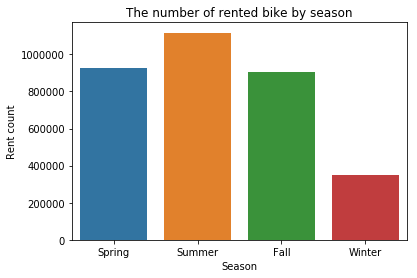

In [7]:
#1-a season graph
group_season = train_rent.groupby(['SEASON'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_season['SEASON'], y=group_season['RENTCOUNT'])
ax.set(xlabel='Season', ylabel='Rent count')
season = ['Spring', 'Summer', 'Fall', 'Winter']
plt.xticks(np.arange(4), season)
plt.title('The number of rented bike by season')
plt.show()

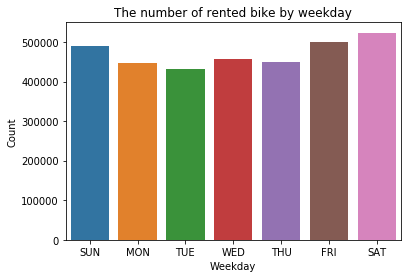

In [8]:
#1-a weekday graph
group_weekday = train_rent.groupby(['WEEKDAY'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_weekday['WEEKDAY'], y=group_weekday['RENTCOUNT'])
ax.set(xlabel='Weekday', ylabel='Count')
season = ['SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT']
plt.xticks(np.arange(7), season)
plt.title('The number of rented bike by weekday')
plt.show()

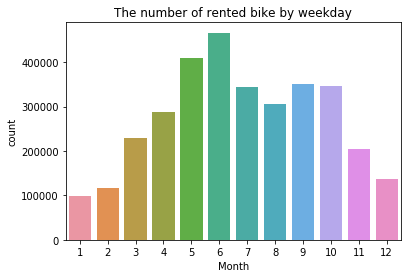

In [9]:
#1-a month graph
group_mn = train_rent.groupby(['MONTH'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_mn['MONTH'], y=group_mn['RENTCOUNT'])
ax.set(xlabel='Month', ylabel='count')
plt.title('The number of rented bike by weekday')
plt.show()

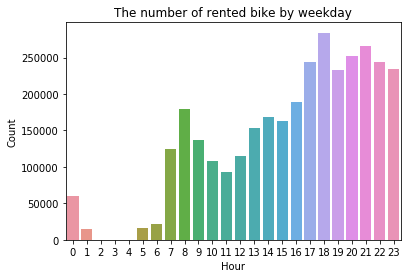

In [10]:
#1-a hour graph
group_hr = train_rent.groupby(['HOUR'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_hr['HOUR'], y=group_hr['RENTCOUNT'])
ax.set(xlabel='Hour', ylabel='Count')
plt.title('The number of rented bike by weekday')
plt.show()

## 1-B 인기 경로 map

In [11]:
rent = rent[rent.RENT_STATION < 145]
rent = rent[rent.RETURN_STATION < 145]

In [12]:
top10 = rent.groupby(['RENT_STATION','RETURN_STATION']).size().nlargest(10).reset_index()

In [13]:
top10

,RENT_STATION,RETURN_STATION,0
0,3.0,3.0,84496
1,31.0,31.0,21749
2,56.0,56.0,18343
3,21.0,105.0,17220
4,1.0,1.0,14489
5,32.0,32.0,12177
6,105.0,21.0,12154
7,33.0,33.0,11973
8,17.0,17.0,11966
9,56.0,32.0,11868


In [14]:
rent_top10_lat = []
rent_top10_lon = []
rt_top10_lat = []
rt_top10_lon = []

for j in range(0,10):
    rent_station = int(top10.iloc[j]['RENT_STATION'])
    rt_station = int(top10.iloc[j]['RETURN_STATION'])
    for i in station_df.번호:
        if i == rent_station:
            temp = station_df.iloc[i-1][7].split(',')
            rent_top10_lat.append(float(temp[0]))
            rent_top10_lon.append(float(temp[1]))
        if i == rt_station:
            temp = station_df.iloc[i-1][7].split(',')
            rt_top10_lat.append(float(temp[0]))
            rt_top10_lon.append(float(temp[1]))

### 인기 대여, 반납 장소 지도에 표시

In [15]:
gmapl = gmplot.GoogleMapPlotter(statistics.median(rent_top10_lat),
                               statistics.median(rent_top10_lon), 14)
gmapl.scatter(rent_top10_lat, rent_top10_lon, '#FF0000',size=30, marker=False)
gmapl.scatter(rt_top10_lat, rt_top10_lon, '#FF0000',size=30, marker=False)

for i in range(0,10):
    top10_lat = [rent_top10_lat[i], rt_top10_lat[i]]
    top10_lon = [rent_top10_lon[i], rt_top10_lon[i]]
    gmapl.plot(top10_lat, top10_lon, 'cornflowerblue', edge_width = 3.0)

gmapl.draw('top10.html')

## 1-B 추가 대여 지점으로 돌아오는 경로 제외

In [16]:
rent = rent[rent.RENT_STATION != rent.RETURN_STATION]

In [17]:
top10_bonus = rent.groupby(['RENT_STATION','RETURN_STATION']).size().nlargest(10).reset_index()

In [18]:
top10_bonus

,RENT_STATION,RETURN_STATION,0
0,21.0,105.0,17220
1,105.0,21.0,12154
2,56.0,32.0,11868
3,32.0,56.0,11118
4,105.0,22.0,8074
5,107.0,105.0,7912
6,22.0,105.0,7463
7,21.0,22.0,6556
8,1.0,3.0,6135
9,105.0,107.0,6065


In [19]:
rent_top10_lat_2 = []
rent_top10_lon_2 = []
rt_top10_lat_2 = []
rt_top10_lon_2 = []

for j in range(0,10):
    rent_station = int(top10_bonus.iloc[j]['RENT_STATION'])
    rt_station = int(top10_bonus.iloc[j]['RETURN_STATION'])
    for i in station_df.번호:
        if i == rent_station:
            temp = station_df.iloc[i-1][7].split(',')
            rent_top10_lat_2.append(float(temp[0]))
            rent_top10_lon_2.append(float(temp[1]))
        if i == rt_station:
            temp = station_df.iloc[i-1][7].split(',')
            rt_top10_lat_2.append(float(temp[0]))
            rt_top10_lon_2.append(float(temp[1]))

In [20]:
gmapl = gmplot.GoogleMapPlotter(statistics.median(rent_top10_lat_2),
                               statistics.median(rent_top10_lon_2), 14)
gmapl.scatter(rent_top10_lat_2, rent_top10_lon_2, '#FF0000',size=30, marker=False)
gmapl.scatter(rt_top10_lat_2, rt_top10_lon_2, '#FF0000',size=30, marker=False)

for i in range(0,10):
    top10_lat_2 = [rent_top10_lat_2[i], rt_top10_lat_2[i]]
    top10_lon_2 = [rent_top10_lon_2[i], rt_top10_lon_2[i]]
    gmapl.plot(top10_lat_2, top10_lon_2, 'cornflowerblue', edge_width = 3.0)

gmapl.draw('top10_bonus.html')

## 1-C 이용경로 (Chord diagram)

In [21]:
###################
# chord diagram
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
##################################

In [22]:
mpl.rcParams['axes.unicode_minus'] = False
LW = 0.3

In [23]:
def polar2xy(r, theta):
    return np.array([r*np.cos(theta), r*np.sin(theta)])

def hex2rgb(c):
    return tuple(int(c[i:i+2], 16)/256.0 for i in (1, 3 ,5))

In [24]:
def IdeogramArc(start=0, end=60, radius=1.0, width=0.2, ax=None, color=(1,0,0)):
    # start, end should be in [0, 360)
    if start > end:
        start, end = end, start
    start *= np.pi/180.
    end *= np.pi/180.
    # optimal distance to the control points
    # https://stackoverflow.com/questions/1734745/how-to-create-circle-with-b%C3%A9zier-curves
    opt = 4./3. * np.tan((end-start)/ 4.) * radius
    inner = radius*(1-width)
    verts = [
        polar2xy(radius, start),
        polar2xy(radius, start) + polar2xy(opt, start+0.5*np.pi),
        polar2xy(radius, end) + polar2xy(opt, end-0.5*np.pi),
        polar2xy(radius, end),
        polar2xy(inner, end),
        polar2xy(inner, end) + polar2xy(opt*(1-width), end-0.5*np.pi),
        polar2xy(inner, start) + polar2xy(opt*(1-width), start+0.5*np.pi),
        polar2xy(inner, start),
        polar2xy(radius, start),
        ]

    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.LINETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CLOSEPOLY,
             ]

    if ax == None:
        return verts, codes
    else:
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor=color+(0.5,), edgecolor=color+(0.4,), lw=LW)
        ax.add_patch(patch)

In [25]:
def ChordArc(start1=0, end1=60, start2=180, end2=240, radius=1.0, chordwidth=0.7, ax=None, color=(1,0,0)):
    # start, end should be in [0, 360)
    if start1 > end1:
        start1, end1 = end1, start1
    if start2 > end2:
        start2, end2 = end2, start2
    start1 *= np.pi/180.
    end1 *= np.pi/180.
    start2 *= np.pi/180.
    end2 *= np.pi/180.
    opt1 = 4./3. * np.tan((end1-start1)/ 4.) * radius
    opt2 = 4./3. * np.tan((end2-start2)/ 4.) * radius
    rchord = radius * (1-chordwidth)
    verts = [
        polar2xy(radius, start1),
        polar2xy(radius, start1) + polar2xy(opt1, start1+0.5*np.pi),
        polar2xy(radius, end1) + polar2xy(opt1, end1-0.5*np.pi),
        polar2xy(radius, end1),
        polar2xy(rchord, end1),
        polar2xy(rchord, start2),
        polar2xy(radius, start2),
        polar2xy(radius, start2) + polar2xy(opt2, start2+0.5*np.pi),
        polar2xy(radius, end2) + polar2xy(opt2, end2-0.5*np.pi),
        polar2xy(radius, end2),
        polar2xy(rchord, end2),
        polar2xy(rchord, start1),
        polar2xy(radius, start1),
        ]

    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             ]

    if ax == None:
        return verts, codes
    else:
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor=color+(0.5,), edgecolor=color+(0.4,), lw=LW)
        ax.add_patch(patch)

In [26]:
def selfChordArc(start=0, end=60, radius=1.0, chordwidth=0.7, ax=None, color=(1,0,0)):
    # start, end should be in [0, 360)
    if start > end:
        start, end = end, start
    start *= np.pi/180.
    end *= np.pi/180.
    opt = 4./3. * np.tan((end-start)/ 4.) * radius
    rchord = radius * (1-chordwidth)
    verts = [
        polar2xy(radius, start),
        polar2xy(radius, start) + polar2xy(opt, start+0.5*np.pi),
        polar2xy(radius, end) + polar2xy(opt, end-0.5*np.pi),
        polar2xy(radius, end),
        polar2xy(rchord, end),
        polar2xy(rchord, start),
        polar2xy(radius, start),
        ]

    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             ]

    if ax == None:
        return verts, codes
    else:
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor=color+(0.5,), edgecolor=color+(0.4,), lw=LW)
        ax.add_patch(patch)

In [27]:
def chordDiagram(X, ax, colors=None, width=0.1, pad=2, chordwidth=0.7):
    """Plot a chord diagram
    Parameters
    ----------
    X :
        flux data, X[i, j] is the flux from i to j
    ax :
        matplotlib `axes` to show the plot
    colors : optional
        user defined colors in rgb format. Use function hex2rgb() to convert hex color to rgb color. Default: d3.js category10
    width : optional
        width/thickness of the ideogram arc
    pad : optional
        gap pad between two neighboring ideogram arcs, unit: degree, default: 2 degree
    chordwidth : optional
        position of the control points for the chords, controlling the shape of the chords
    """
    # X[i, j]:  i -> j
    x = X.sum(axis = 1) # sum over rows
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)

    if colors is None:
    # use d3.js category10 https://github.com/d3/d3-3.x-api-reference/blob/master/Ordinal-Scales.md#category10
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                  '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                  '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                  '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                  '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                  '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                  '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                  '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                  '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                  '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                  '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                  '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                  '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                  '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                  '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
        colors = [hex2rgb(colors[i]) for i in range(len(x))]

    # find position for each start and end
    y = x/np.sum(x).astype(float) * (360 - pad*len(x))

    pos = {}
    arc = []
    nodePos = []
    start = 0
    for i in range(len(x)):
        end = start + y[i]
        arc.append((start, end))
        angle = 0.5*(start+end)
        #print(start, end, angle)
        if -30 <= angle <= 210:
            angle -= 90
        else:
            angle -= 270
        nodePos.append(tuple(polar2xy(1.1, 0.5*(start+end)*np.pi/180.)) + (angle,))
        z = (X[i, :]/x[i].astype(float)) * (end - start)
        ids = np.argsort(z)
        z0 = start
        for j in ids:
            pos[(i, j)] = (z0, z0+z[j])
            z0 += z[j]
        start = end + pad

    for i in range(len(x)):
        start, end = arc[i]
        IdeogramArc(start=start, end=end, radius=1.0, ax=ax, color=colors[i], width=width)
        start, end = pos[(i,i)]
        selfChordArc(start, end, radius=1.-width, color=colors[i], chordwidth=chordwidth*0.7, ax=ax)
        for j in range(i):
            color = colors[i]
            if X[i, j] > X[j, i]:
                color = colors[j]
            start1, end1 = pos[(i,j)]
            start2, end2 = pos[(j,i)]
            ChordArc(start1, end1, start2, end2,
                     radius=1.-width, color=colors[i], chordwidth=chordwidth, ax=ax)

    #print(nodePos)
    return nodePos

In [28]:
rent = pd.read_csv('./data/clean/tashu.csv')

In [29]:
rent = rent[rent.RENT_STATION < 145]
rent = rent[rent.RETURN_STATION < 145]

In [30]:
rent = rent.groupby(['RENT_STATION','RETURN_STATION']).size().reset_index()

In [31]:
arr = np.zeros((144,144))
arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
rent['RENT_STATION'] = rent['RENT_STATION'].astype('int')
rent['RETURN_STATION'] = rent['RETURN_STATION'].astype('int')

In [33]:
for i in range(18295):
    x = rent.iloc[i]['RENT_STATION']
    y = rent.iloc[i]['RETURN_STATION']
    arr[x-1][y-1] = rent.iloc[i][0]

In [34]:
station_df = pd.read_csv('./data/station.csv')

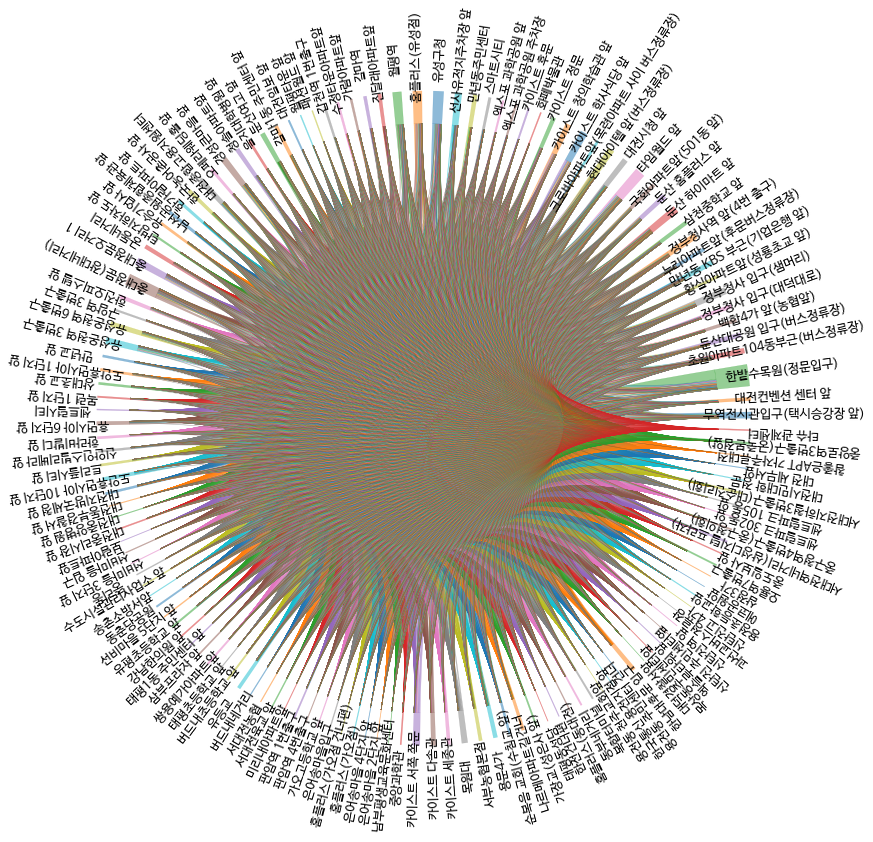

In [35]:
if __name__ == "__main__":
    
    path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    font_name = fm.FontProperties(fname=path, size=20).get_name()
    plt.rc('font', family=font_name)
    plt.style.use('ggplot')
    
    
    fig = plt.figure(figsize=(10,10))
    flux = arr
    ax = plt.axes([0,0,1,1])
    #nodePos = chordDiagram(flux, ax, colors=[hex2rgb(x) for x in ['#666666', '#66ff66', '#ff6666', '#6666ff']])
    nodePos = chordDiagram(flux, ax)
    ax.axis('off')
    prop = dict(fontsize=16*0.8, ha='center', va='center')
    nodes = station_df['명칭']
    for i in range(144):
        ax.text(nodePos[i][0], nodePos[i][1], nodes[i], rotation=nodePos[i][2]+90, **prop)
    
    plt.savefig("chord.png", dpi=600,
            transparent=True,
            bbox_inches='tight', pad_inches=0.02)

## 2-A 예측 영향도

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
train_data = pd.read_csv('./data/total_rent.csv')
train_data= train_data.fillna(value=0.0)
train_data = train_data.drop(columns = ['STATION', 'YEAR', 'DAY'])
train_data['MONTH'] = train_data['MONTH'].astype('object')
train_data['HOUR'] = train_data['HOUR'].astype('object')
train_data['WEEKDAY'] = train_data['WEEKDAY'].astype('object')
train_data['SEASON'] = train_data['SEASON'].astype('object')
train_data.head(5)

,MONTH,HOUR,WEEKDAY,SEASON,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,SNOWFALL,RENTCOUNT
0,1,0,2,3,-8.8,0.0,0.1,90.0,8.8,0.0
1,1,1,2,3,-8.5,0.0,0.9,90.0,8.8,0.0
2,1,2,2,3,-8.5,0.0,1.0,89.0,8.8,0.0
3,1,3,2,3,-9.0,0.0,0.7,91.0,8.8,0.0
4,1,4,2,3,-9.1,0.0,0.6,92.0,8.8,0.0


In [4]:
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
y_train += np.ones(len(y_train)) # to avoid divide_by_0

In [5]:
# Randomforest를 통한 학습 진행
rf = RandomForestRegressor(n_estimators = 50)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [6]:
importances = list(rf.feature_importances_)

In [7]:
for i in range(len(importances)):
    importances[i] = round(importances[i],2)

In [8]:
x_train = train_data.drop(columns=['RENTCOUNT'])

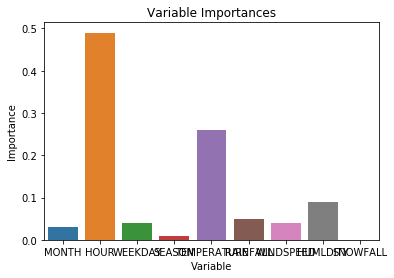

In [11]:
ax = sns.barplot(x=x_train.columns, y=importances)
ax.set(xlabel='Variable', ylabel='Importance')
plt.title('Variable Importances')
plt.show()

## 2-B 하루 시간별 대여량 예측 모델

In [12]:
train = pd.read_csv('./data/total_rent.csv') # 2015년 1월 1일 3번 정류장
train.head(5)

,STATION,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,SNOWFALL,RENTCOUNT
0,1,2013,1,1,0,2,3,-8.8,NaN,0.1,90.0,8.8,0.0
1,1,2013,1,1,1,2,3,-8.5,NaN,0.9,90.0,8.8,0.0
2,1,2013,1,1,2,2,3,-8.5,NaN,1.0,89.0,8.8,0.0
3,1,2013,1,1,3,2,3,-9.0,NaN,0.7,91.0,8.8,0.0
4,1,2013,1,1,4,2,3,-9.1,NaN,0.6,92.0,8.8,0.0


In [13]:
test_data = train[train.YEAR == 2015]
test_data = test_data[test_data.MONTH == 1]
test_data = test_data[test_data.DAY == 1]
test_data = test_data[test_data.STATION == 3]

In [14]:
test_data = test_data.drop(columns=['STATION', 'YEAR', 'DAY'])

In [15]:
test_data['MONTH'] = test_data['MONTH'].astype('object')
test_data['HOUR'] = test_data['HOUR'].astype('object')
test_data['WEEKDAY'] = test_data['WEEKDAY'].astype('object')
test_data['SEASON'] = test_data['SEASON'].astype('object')

In [16]:
test_data = test_data.fillna(value = 0.0)
test_data.head(5)

,MONTH,HOUR,WEEKDAY,SEASON,TEMPERATURE,RAINFALL,WINDSPEED,HUMLDITY,SNOWFALL,RENTCOUNT
70080,1,0,4,3,-4.1,0.3,4.2,82.0,0.5,0.0
70081,1,1,4,3,-5.7,0.0,2.8,74.0,0.5,0.0
70082,1,2,4,3,-6.4,0.0,2.6,60.0,0.5,0.0
70083,1,3,4,3,-6.5,0.0,2.7,53.0,0.5,0.0
70084,1,4,4,3,-6.6,0.0,2.5,61.0,0.5,0.0


In [17]:
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values
y_test += np.ones(len(y_test))

In [18]:
# RSME 계산
predictions = rf.predict(X_test)
errors = np.sqrt(np.mean((predictions - y_test)**2))
print('Error: ', round(errors, 2), 'degrees.')

Error:  1.46 degrees.


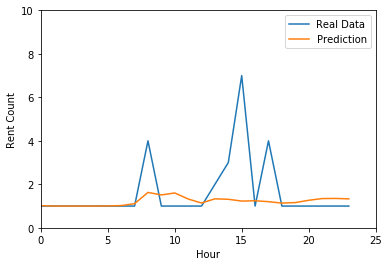

In [20]:
from pylab import plot, show
plt.xlim(0,25)
plt.ylim(0,10)
plt.plot(X_test[:,1], y_test)
plt.plot(X_test[:,1], predictions)
plt.xlabel('Hour')
plt.ylabel('Rent Count')
plt.legend(['Real Data', 'Prediction'], loc='best')
plt.show()